# Семинар 5: Бинарная линейная классификация.

## Теоретическая часть

### Предсказания в бинарной линейной классификации
__Вспомнить из лекции:__
* Как выполняются предсказания в бинарной линейной классификации?
* Как интерпретировать веса?
* Вспомните обозначения $\langle \cdot, \cdot \rangle$, $sign(z)$, $[z>a]$.

#### Задача 1.
Какое предсказание вернет бинарный линейный классификатор $a(x) = sign(\langle w, x \rangle+w_0)$ для объекта $x=(1, 0, 0, 1, 1)$ при использовании весов $w=(0.1, -0.2, 0.5, -1.1, 0)$ и $w_0=0.35$?

__Решение.__
Запишем скалярное произведение: $\langle w, x \rangle = w_1 x_1 + \dots + w_d x_d$, где $d$ - размерность обоих векторов (число признаков). В нашей задаче $d=5$. Итак, в скобках получится значение $0.1\cdot1 - 0.2\cdot0 + 0.5\cdot 0 -1.1 \cdot 1 + 0 \cdot 1 + 0.35 = -0.65$. Его знак отрицательный, значит $a(x) = -1$.

#### Задача 2.
Визуализируйте разделящую поверхность классификатора $a(x) = sign(\langle w, x \rangle+w_0)$ для $w=(-1, 2)$, $w_0=0.5$, задача бинарной классификации с двумя признаками.

__Решение.__

Предсказания в линейной классификации выполняются по формуле $a(x) = sign(\langle w, x\rangle +w_0)$, то есть класс +1, если выражение в скобках больше 0, и -1, если выражение в скобках меньше 0. Если выражение в скобках равно 0, считаем, что отказываемся от классификации или выбираем случайный класс (на практике такая ситуация встречается очень редко). Соответственно, мы можем сделать такое предсказание в каждой точке признакового пространства, то есть для любого возможного объекта, и получить области классов +1 и -1. Разделяющей границей этих двух областей будет прямая, поэтому классификация линейная.

Разберемся, почему разделяющей границей будет прямая. Вспомним, что уравнение $w_1 x_1 + w_2 x_2 + w_0 = 0$ задает прямую на плоскости в координатах $x_1-x_2$ (мы обычно обозначаем эти координаты $d_1-d_2$, чтобы не путать $x_1$ - первый признак или первый объект в выборке; в данном контексте - первый признак). Все точки $x=(x_1, x_2)$, для которых $w_1 x_1 + w_2 x_2 + w_0 > 0$, находятся с одной стороны от прямой, а все точки, для которых $w_1 x_1 + w_2 x_2 + w_0 < 0$, с другой стороны от прямой. А эти два условия как раз и проверяются в бинарном линейной классификаторе.

В нашем случае прямая задается уравнением $-x_1 + 2 x_2 + 0.5 = 0$. Построим ее по точкам: при $x_1=0$ выполнено $2 x_2+0.5=0$, то есть $x_2=-1/4$; при $x_1=1$ выполнено $2 x_2 -0.5=0$, то есть $x_2=1/4$. Проводим прямую через точки $(0, -1/4)$ и $(1, 1/4)$. Теперь выбираем любую точку, не принадлежащую прямой, например $(0, 1/4)$. Проверяем, какой будет знак выражения $-x_1 + 2 x_2 + 0.5$: $0 + 0.5 + 0.5 = 1 > 0$. Значит, в полуплоскости, где находится эта точка, мы предсказываем класс +1, а в другой - класс -1.

### Вспомнить из лекции
* Какие метрики бинарной классификации вы знаете?
* Какие проблемы есть у метрики accuracy? в каких случаях она нам не подходит?
* Что такое матрица ошибок?

## Практическая часть
В практической части мы обучим линейный классификатор на данных кредитного скорринга, проанализируем веса модели, научимся работать с категориальными признаками в линейных моделях. Далее поработаем с метриками, сравних их между собой и найдем оптимиальные гиперпараметры в модели.

In [1]:
import pandas as pd

Мы будем работать с [данными клиентов банка](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) и решать задачу кредитного скоринга.

Значения признаков:
* account: банковский счет (-1: отриц. баланс, 0: нет счета, 1: до 200 ед., 2: более 200 ед.)
* duration: на какой период запрашивают кредит
* credit_history: рейтинг по кредитной истории (от 0 - отличная кр. история до 4 - критическая ситуация с кредитами)
* amount: на какую сумму запрашивают кредит
* savings: сберегательный счет (0: нет, 1: < 100, 2: 100 <= ... < 500, 3: 500 <= ... < 1000, 4:  >= 1000)
* employment: срок работы на текущей позиции (0: не работает, 1: до 1 года, 2: от 1 до 4 лет, 3: от 4 до 7 лет, 4: более 7 лет)
* guarantors: 1 - есть поручители, 0 - нет
* residence:  сколько лет резидент
* age: возраст, деленный на 100
* credits_number: число кредитов
* job: 0: не работает, 1: неквалифицированный, 2: квалифицированный специалист, 3: высокая должность или бизнес
* maintenance_people: число людей, которых обеспечивает заемщик
* telephone: указан ли телефон (1: да, 0: нет)
* foreign: 1: иностранец, 0: нет
* real_estate: 1: есть недвижимость, 0: нет недвижимости
* life_insurance: 1: оформлено страхование жизни, 0, нет страховки
* car: 1: есть автомобиль, 0: нет автомобиля
* housing_rent: 1: платит за съем жилья, 0: не платит за съем жилья
* sex: пол - 1: муж., 0: жен.
* purpose: на какую цель запрашивают кредит (из нескольких вариантов)
* target: 1: кредит выдан, 0: в кредите отказано

Требуется решить задачу предсказания значения в последнем столбце, то есть задачу бинарной классификации.

In [2]:
# !pip install xlrd

In [3]:
tab = pd.read_excel(
    "https://github.com/nadiinchi/voronovo_seminar_materials/blob/master/base_track/seminars/scoring.xls?raw=true"
)
tab.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0


По строкам информация о клиентах. Целевая переменная — выдан кредит или нет.

In [4]:
tab.dtypes

,0
account,int64
duration,float64
credit_history,int64
amount,float64
savings,int64
employment,int64
guarantors,int64
residence,int64
age,float64
credits_number,int64


Признаки в основном числовые.

In [5]:
tab["target"].value_counts()

,count
target,
1,300
0,300


Классы сбалансированы.

Создаем матрицу объекты-признаки и матрицу ответов. Удалим пока столбец с категориальной переменной, чтобы оставить только числовые признаки.

In [6]:
X = tab[tab.columns[:-2]]
y = tab["target"]

In [7]:
X.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,2,1,0,1,0,0,1,0,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,2,1,1,1,0,1,0,0,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,2,1,0,1,0,1,0,1,1
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,2,1,0,1,0,0,1,0,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,2,1,1,1,0,0,0,0,1


#### Разделение выборки

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=0
)

In [10]:
y_train.value_counts()

,count
target,
1,222
0,198


In [11]:
y_test.value_counts()

,count
target,
0,102
1,78


In [12]:
X_train.shape, y_train.shape

((420, 19), (420,))

#### Нормируем данные

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Импортируем класс модели

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [16]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = clf_lr.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred > 0.5)

0.6388888888888888

#### Важности и веса признаков
Большинство алгоритмов умеют так или иначе оценивать важности признаков.
В линейной модели в качестве важностей можно рассматривать веса признаков. Они хранятся в атрибуте coef\_ и появляются, конечно, только после вызова процедуры обучения.

In [19]:
clf_lr.coef_

array([ 0.03344627, -0.0779239 ,  0.08754819, -0.02066605,  0.03067396,
        0.06774134, -0.00975411,  0.00109616,  0.0185817 , -0.04661195,
        0.00099741, -0.00569433,  0.01735849, -0.03505761,  0.06359324,
       -0.0134745 ,  0.06344944, -0.0416773 ,  0.05088774])

**Задание.** Оформить веса признаков в виде датафрейма: первый столбец - имя признака, второй столбец - вес, и отсортировать датафрейм по увеличению веса.

In [20]:
# Ваш код сюда :)
coefs = pd.DataFrame(clf_lr.coef_, index=X.columns)
coefs.sort_values(0)

,0
duration,-0.077924
credits_number,-0.046612
housing_rent,-0.041677
foreign,-0.035058
amount,-0.020666
life_insurance,-0.013474
guarantors,-0.009754
maintenance_people,-0.005694
job,0.000997
residence,0.001096


Признаки отсортировались по логичным критериям: плата за съем жилья, число кредитов, заемщик-иностранец уменьшают шанс получить кредит; наличие собственности, машины, работы, счета в банке - увеличивают шансы. Впрочем, некоторые признаки отсортировались менее логично: например, наличие поручителя тоже голосует в "минус", хотя и с маленьким весом.

__Обратите внимание:__ интерпретировать величину весов можно, только если данные отнормированы. Иначе модуль веса будет зависеть от масштаба признака.

#### Работа с категориальным признаком

Применим метод one-hot-encoding к переменной "цель получения кредита", чтобы включить ее в модель.

In [21]:
tab_ohe = pd.get_dummies(tab, "purpose")
tab_ohe.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,purpose_business,purpose_car_new,purpose_car_used,purpose_domestic_appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,True,False,False,False,False,False,False,False,False,False
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,True,False,False,False,False,False,False,False,False,False
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,False,False,False,False,False,False,False,False,True,False
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,True,False,False,False,False,False,False,False,False,False
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,False,False,False,False,True,False,False,False,False,False


In [22]:
X_ohe = tab_ohe.drop("target", axis=1)
X_train_ohe, X_test_ohe, y_train, y_test = train_test_split(
    X_ohe, y, test_size=0.3, shuffle=True, random_state=0
)
scaler = StandardScaler()
X_train_ohe = scaler.fit_transform(X_train_ohe)
X_test_ohe = scaler.transform(X_test_ohe)

In [23]:
clf = LinearRegression()
clf.fit(X_train_ohe, y_train)
y_pred = clf.predict(X_test_ohe)
print(f"Accuracy: {accuracy_score(y_test, y_pred > 0.5):.2f}")

Accuracy: 0.67


Качество с новым признаком повысилось.

А что, если мы просто пронумеруем категории? Для этого воспользуемся классом LabelEncoder:

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
tab["purpose"] = le.fit_transform(tab["purpose"])
X_le = tab[tab.columns[:-1]]
X_train_le, X_test_le, y_train, y_test = train_test_split(
    X_le, y, test_size=0.3, shuffle=True, random_state=0
)
scaler = StandardScaler()
X_train_le = scaler.fit_transform(X_train_le)
X_test_le = scaler.transform(X_test_le)

In [26]:
clf = LinearRegression()
clf.fit(X_train_le, y_train)
y_pred = clf.predict(X_test_le)
print(f"Accuracy: {accuracy_score(y_test, y_pred > 0.5):.2f}")

Accuracy: 0.65


Посчитаем метрики нашей модели. Метрики разобранные на лекции уже реализованы в библиотеке scikit-learn.

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred > 0.5)

array([[55, 47],
       [16, 62]])

In [28]:
from sklearn.metrics import precision_score

print(f"Precision: {precision_score(y_test, y_pred > 0.5):.2f}")

Precision: 0.57


In [29]:
from sklearn.metrics import recall_score

print(f"Recall: {recall_score(y_test, y_pred > 0.5):.2f}")

Recall: 0.79


In [30]:
from sklearn.metrics import f1_score

print(f"F1: {f1_score(y_test, y_pred > 0.5):.2f}")

F1: 0.66


Порог 0.5 мы выбрали самостоятельно, и мы можем его менять. Как увеличение порога отразится на precision/recall? На практике, перед нами всегда встает трейдофф: потерять часть сигнала взамен на большую точность или получить false positives взамен на больший recall.

**Задание.** Постройте на одном графике precision, recall и f1 score в зависимости от порога.

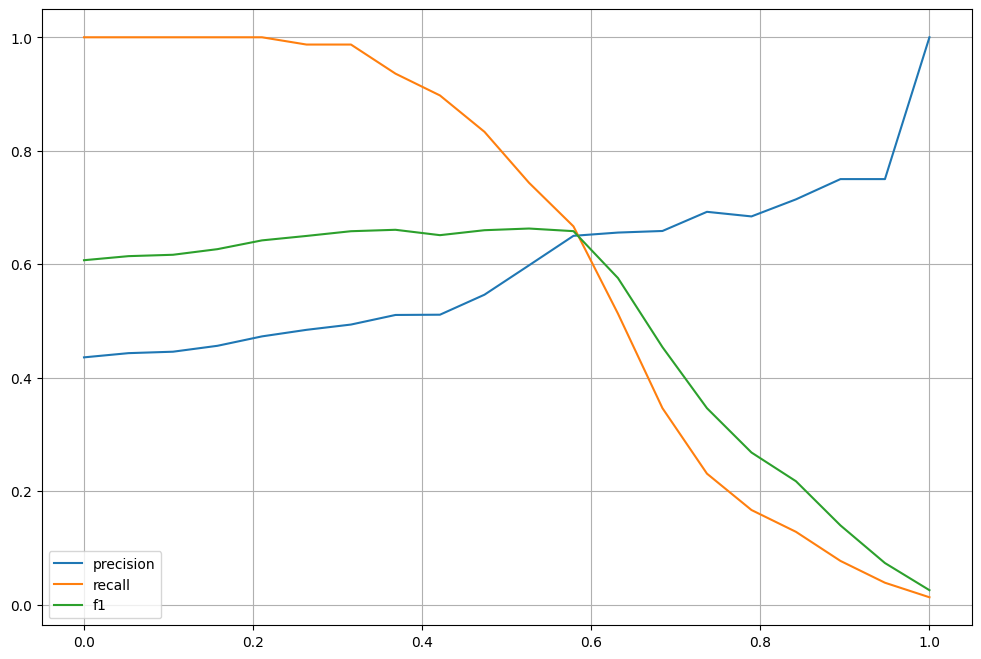

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Ваш код сюда :)
thresholds = np.linspace(0, 1, 20)
precisions = [precision_score(y_test, y_pred > thrsh) for thrsh in thresholds]
recalls = [recall_score(y_test, y_pred > thrsh) for thrsh in thresholds]
f1s = [f1_score(y_test, y_pred > thrsh) for thrsh in thresholds]

plt.figure(figsize=(12, 8))
plt.plot(thresholds, precisions, label="precision")
plt.plot(thresholds, recalls, label="recall")
plt.plot(thresholds, f1s, label="f1")
plt.grid()
plt.legend()
plt.show()

**Задание.** Найдите порог, который соответствует максимизации f1 score.

In [32]:
# Ваш код сюда :)
best_thrsh = thresholds[np.argmax(f1s)]
print(
    f"Best threshold is {best_thrsh:.2f}. F1 score for the threshold is {np.max(f1s):.2f}."
)

Best threshold is 0.53. F1 score for the threshold is 0.66.


**Задание.** Обучите линейную регрессию с регуляризацией и подберите параметр регуляризации исходя из максимального f1-score.

In [33]:
from sklearn.linear_model import Lasso

alphas = np.linspace(0.1, 30, 100)
f1s = []

# Ваш код сюда :)
for alpha in alphas:
    regressor = Lasso(alpha=alpha)
    regressor.fit(X_train_le, y_train)
    y_pred = regressor.predict(X_test_le)
    f1s.append(f1_score(y_test, y_pred > 0.5))

print(
    f"Best alpha is {alphas[np.argmax(np.array(f1s))]:.2f}. F1 score for the threshold is {np.max(f1s):.2f}."
)

Best alpha is 0.10. F1 score for the threshold is 0.60.
